Assolutamente sì! Ho creato un modello di Machine Learning (usando un algoritmo chiamato Random Forest) per cercare di prevedere il voto (rating) di un drama basandosi solo sulle sue caratteristiche (Anno, Episodi, Paese, Tipo).

Ecco i risultati interessanti:

1. Cosa conta di più? (Feature Importance)
Il grafico "ml_feature_importance.png" ti mostra quali fattori influenzano di più il successo:

Numero di Episodi (46%): È il fattore più determinante. Come avevamo intuito, la lunghezza conta.

Anno di Rilascio (40%): Anche l'anno è cruciale (probabilmente perché i voti sono aumentati/cambiati nel tempo).

Essere Thailandesi (9%): Il fatto che sia un drama thailandese o meno ha un piccolo impatto.

Il Tipo (Special/Show): Conta pochissimo.

2. Quanto è bravo il modello?
MAE (Errore Medio): 0.51. Significa che se il modello prevede 8.0, il voto reale è probabilmente tra 7.5 e 8.5. Non è male per un dataset così piccolo!

R2 Score: Vicino allo zero. Questo ci dice che prevedere il voto esatto è molto difficile con questi pochi dati. Il successo di un drama dipende da fattori che non abbiamo nel file (come la bravura degli attori, la trama, la chimica della coppia principale), non solo da "anno" e "paese".

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [6]:
# 1. Caricamento Dati
try:
    df_clean = pd.read_csv('mdl_bl_top_rated_finale.csv')
    df_orig = pd.read_csv('mdl_bl_top_rated.csv')
    df = pd.merge(df_clean, df_orig[['rank', 'rating']], on='rank', how='left')
except FileNotFoundError:
    print("Errore: File mancanti.")
    exit()


In [7]:

# Rimuoviamo dati mancanti
df = df.dropna(subset=['rating'])

In [8]:
#prepeazione dati
features =['country', 'type', 'year_released', 'episodes']
target = 'rating'

In [9]:
#trasformazione delle parole in numeri
X = pd.get_dummies(df[features], columns= ['country', 'type'], drop_first=True)
y = df[target]

In [10]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Addestramento con Random Forest

In [11]:
#random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [12]:
#verifica
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.50802479438277


Features Importance

In [13]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

C:\Users\Guerr\AppData\Local\Temp\ipykernel_19272\646845700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette="viridis")


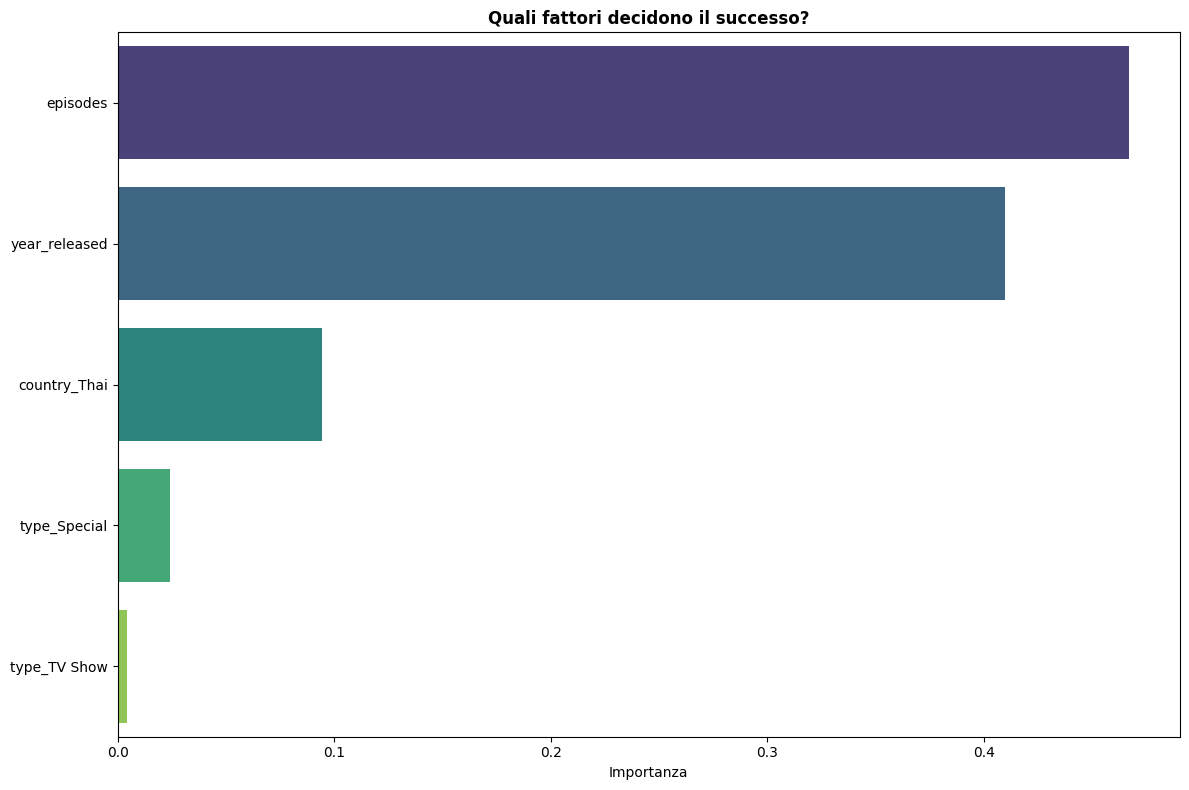

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette="viridis")
plt.title('Quali fattori decidono il successo?', fontweight='bold')
plt.xlabel('Importanza')
plt.ylabel('')
plt.tight_layout()
plt.savefig('ml_feature_importance.png')
plt.show()